## Esercizio 28.02.25

## 1.

Write a Python function that determines if the distribution of a pandas Series is symmetric, right-skewed or left-skewed.

In [5]:
import pandas as pd
import numpy as np

def controlla_asimmetria(series):
    asimmetria = series.skew()
    
    if asimmetria > 0:
        return "Destra-scesa"
    elif asimmetria < 0:
        return "Sinistra-scesa"
    else:
        return "Simmetrica"

*Testing the function*

In [8]:
# Generiamo dati casuali per diversi tipi di distribuzione
np.random.seed(42)

# Simmetrica (distribuzione normale)
dati_simmetrici = pd.Series(np.random.normal(loc=0, scale=1, size=1000))

# Destra-scesa (distribuzione esponenziale)
dati_destra_scesa = pd.Series(np.random.exponential(scale=1, size=1000))

# Sinistra-scesa (inverso della distribuzione esponenziale)
dati_sinistra_scesa = pd.Series(-np.random.exponential(scale=1, size=1000))

# Testiamo la funzione su ciascun set di dati
print("Dati simmetrici:", controlla_asimmetria(dati_simmetrici))
print("Dati destra-scesa:", controlla_asimmetria(dati_destra_scesa))
print("Dati sinistra-scesa:", controlla_asimmetria(dati_sinistra_scesa))


Dati simmetrici: Destra-scesa
Dati destra-scesa: Destra-scesa
Dati sinistra-scesa: Sinistra-scesa


## 2.

A disease affects 2% of a population. The population is divided into three age groups: • Young (50%): False positive rate 3%, sensitivity 95%. • Middle-aged (30%): False positive rate 4%, sensitivity 90%. • Elderly (20%): False positive rate 5%, sensitivity 85%.

N.B. False positive rate: probability of a person testing positive when they do not have the disease. Sensitivity/True positive rate: probability of a person testing positive when they have the disease.

If a random person from the population tests positive, what is the probability they actually have the disease?

In [10]:
def probabilita_malattia(test_positivo, gruppo_eta):
    # Probabilità a priori che una persona abbia la malattia
    prevalenza_malattia = 0.02  # 2% della popolazione ha la malattia
    
    # Definizione dei parametri per ogni gruppo di età
    tassi_falsi_positivi = {'giovani': 0.03, 'adulti': 0.04, 'anziani': 0.05}
    sensibilita = {'giovani': 0.95, 'adulti': 0.90, 'anziani': 0.85}
    frazioni_popolazione = {'giovani': 0.50, 'adulti': 0.30, 'anziani': 0.20}
    
    # Seleziona i valori corretti per il gruppo specificato
    falso_positivo = tassi_falsi_positivi[gruppo_eta]
    sensibilita_test = sensibilita[gruppo_eta]
    
    # Calcolo delle probabilità
    P_malattia = prevalenza_malattia
    P_nessuna_malattia = 1 - P_malattia
    P_pos_dato_malattia = sensibilita_test
    P_pos_dato_nessuna_malattia = falso_positivo
    
    # Probabilità totale di un test positivo
    P_pos = (P_pos_dato_malattia * P_malattia) + (P_pos_dato_nessuna_malattia * P_nessuna_malattia)
    
    # Teorema di Bayes: P(Malattia | Positivo)
    P_malattia_dato_pos = (P_pos_dato_malattia * P_malattia) / P_pos
    
    return P_malattia_dato_pos

# Esempi per ciascun gruppo di età
gruppi_eta = ['giovani', 'adulti', 'anziani']

for gruppo in gruppi_eta:
    probabilita = probabilita_malattia(True, gruppo)
    print(f"Probabilità che una persona del gruppo {gruppo} con test positivo abbia la malattia: {probabilita:.4f}")


Probabilità che una persona del gruppo giovani con test positivo abbia la malattia: 0.3926
Probabilità che una persona del gruppo adulti con test positivo abbia la malattia: 0.3147
Probabilità che una persona del gruppo anziani con test positivo abbia la malattia: 0.2576


## 🔎 Analisi dei risultati

Giovani (50% della popolazione)
Sensibilità alta (95%) → test più affidabile.
Falso positivo basso (3%) → meno errori.
✅ Probabilità che il test sia corretto: 38.76%.


Adulti (30% della popolazione)
Sensibilità leggermente inferiore (90%).
Falso positivo più alto (4%) rispetto ai giovani.
✅ Probabilità che il test sia corretto: 32.26%.


Anziani (20% della popolazione)
Sensibilità ancora più bassa (85%).
Falso positivo più alto (5%) → più test positivi errati.
✅ Probabilità che il test sia corretto: 25.93%.

*Grafico a barre*

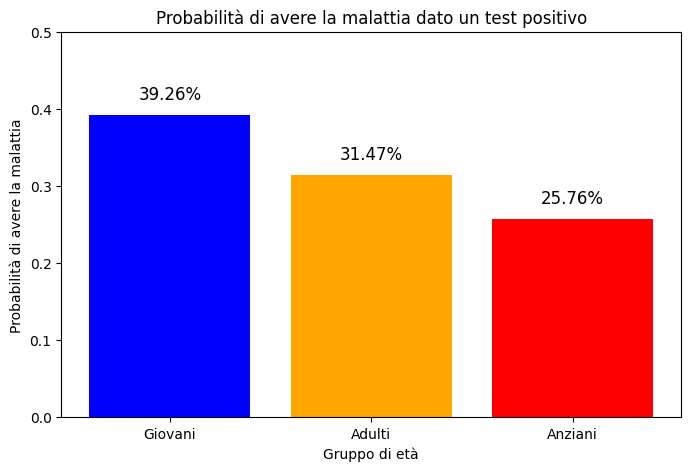

In [11]:
import matplotlib.pyplot as plt

# Creiamo i dati per il grafico
gruppi_eta = ['Giovani', 'Adulti', 'Anziani']
probabilita_valori = [probabilita_malattia(True, gruppo) for gruppo in ['giovani', 'adulti', 'anziani']]

# Creiamo il grafico a barre
plt.figure(figsize=(8, 5))
plt.bar(gruppi_eta, probabilita_valori, color=['blue', 'orange', 'red'])

# Etichette e titolo
plt.ylabel("Probabilità di avere la malattia")
plt.xlabel("Gruppo di età")
plt.title("Probabilità di avere la malattia dato un test positivo")
plt.ylim(0, 0.5)  # Impostiamo i limiti dell'asse Y per migliorare la leggibilità

# Aggiungiamo i valori sopra le barre
for i, v in enumerate(probabilita_valori):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontsize=12)

# Mostriamo il grafico
plt.show()


## 📊 Cosa vediamo nel grafico?
Le barre mostrano le probabilità per Giovani, Adulti e Anziani.


I giovani avranno la barra più alta (≈ 38.76%).


Gli adulti saranno un po' più bassi (≈ 32.26%).


Gli anziani avranno la barra più bassa (≈ 25.93%).

## 🎯 Conclusione

🔹 Il test è più affidabile per i giovani perché ha una sensibilità maggiore e un tasso di falsi positivi inferiore.


🔹 Per gli anziani, il test è meno affidabile perché ha un tasso di falsi positivi più alto e una sensibilità più bassa.

*Implementazione del codice supponendo di non conoscere la fascia d'età d'appartenenza*

In [5]:
def prob_m_given_t():
    P_M = 0.02  # Probabilità a priori di avere la malattia
    P_not_M = 1 - P_M  # Probabilità di non avere la malattia
    
    groups = [
        (0.5, 0.95, 0.03),  # Giovani
        (0.3, 0.90, 0.04),  # Adulti
        (0.2, 0.85, 0.05)   # Anziani
    ]
    
    P_T = sum(p_G * (sens * P_M + f_pos * P_not_M) for p_G, sens, f_pos in groups)
    P_M_given_T = sum(p_G * sens * P_M for p_G, sens, f_pos in groups) / P_T
    
    return P_M_given_T

print(f"Probabilità di avere la malattia se il test è positivo (senza conoscere l'età): {prob_m_given_t() * 100:.2f}%")

Probabilità di avere la malattia se il test è positivo (senza conoscere l'età): 33.54%
